<a href="https://colab.research.google.com/github/Paulin178/Machine-Learning/blob/DATASET-Tr%C3%A8s-Large/R%C3%A9seau_de_Neurone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
9793/9793 [==============================] - 26s 3ms/step - loss: 0.0052 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9996
Epoch 2/10
9793/9793 [==============================] - 26s 3ms/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 0.0026 - val_accuracy: 0.9996
Epoch 3/10
9793/9793 [==============================] - 25s 3ms/step - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.0027 - val_accuracy: 0.9996
Epoch 4/10
9793/9793 [==============================] - 24s 2ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0025 - val_accuracy: 0.9996
Epoch 5/10
9793/9793 [==============================] - 25s 3ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.0025 - val_accuracy: 0.9996
Epoch 6/10
9793/9793 [==============================] - 22s 2ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.0025 - val_accuracy: 0.9996
Epoch 7/10
9793/9793 [==============================] - 26s 3ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.0028 - val_ac

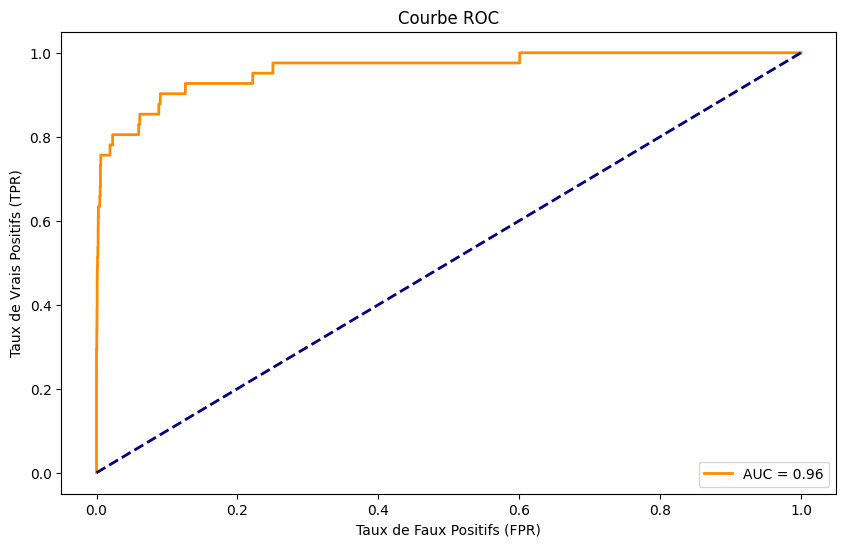

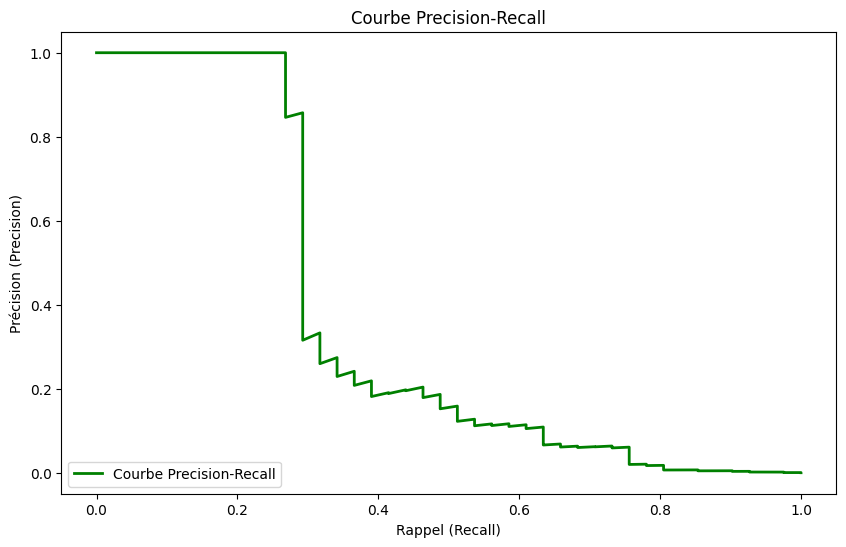

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Chargement des données à partir du fichier CSV
data = pd.read_csv('clear_data.csv')

# Sélection des colonnes pertinentes dans notre fichier CSV
selected_columns = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
                    'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'isFraud']

data = data[selected_columns]

data.dropna(inplace=True)

# Encodage des variables catégorielles avec LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['type', 'nameOrig', 'nameDest']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Séparation des caractéristiques (X) et de la variable cible (y)
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise à l'échelle des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création du modèle de réseau de neurones
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Évaluation du modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Prédictions sur l'ensemble de test
y_prob = model.predict(X_test_scaled)
y_pred = (y_prob > 0.5).astype(int)

# Calcul de l'exactitude (accuracy) du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modèle :", accuracy)

# Matrice de confusion pour évaluer les prédictions
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", conf_matrix)

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')

# Courbe Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', lw=2, label='Courbe Precision-Recall')
plt.xlabel('Rappel (Recall)')
plt.ylabel('Précision (Precision)')
plt.title('Courbe Precision-Recall')
plt.legend(loc='lower left')
plt.show()
